# Modelling of the impact of social tracing apps: a contact network model

by Alexandre Variengien, Simon Dupouy, Guilhem Niot and Timothé Picavet

contact : [alexandre.variengien@ens-lyon.fr]

We wish to thank the _Soyez Prevenus_ team for proposing and organising this modelling challenge !

**An online interactive version of this document is available [here](https://mybinder.org/v2/gh/GuilhemN/covid-19-tracing-app-modelling/master?filepath=model.ipynb)**
### Context of creation

This model was created during the "Hack COVID19" Hackathon, which took place between the 10th and the 12th of April and was organized by HEC and l'École Polytechnique.
It was created to model the impact of the adoption of a social tracing app like STOP COVID in France on the spread of the pandemic.
Its primary goal is to show the influence of parameters such as the proportion of users using the app in the global population or the account of the applicaiton notification: after a suspected transmission is notified by the app, will a citizen choose to directly quarantine himself?

### Motivation

We are students in computer science at the ENS de Lyon, so we aren't experts in the field of epidemiology. This model doesn't aim to provide precise predictions for the future of the pandemic.
However, it is easily understandable and still reasonnably effective to get an overall sense of what we could expect from a social tracing app.
More specifically, it gives a good intuition about the impact a social tracing app may have on the epidemic depending on the adoption rate of the app.
You may try changing the parameters to convince yourself that targeted quarantining of suspected cases can lead to a great limitation of the spread - if it is well adopted by the population.
So feel free to play with our model!

### Bibliography

Contact network epidemiology is a paradigm to modelize an epidemic, it has been widely studied and it can account for the discrepency of transmission between individuals.
It has been discussed that this approach is suited to model an epidemic as SARS-CoV-1 in [1].
Moreover, the structure of the chosen graph has a great impact on the final extent of the outbreak, as discussed in [2].
We chose two models for the graph:
- a model using an exponential law for the degrees distribution - which seems suited for a disease such as SARS in urban areas [3]
- a method from [3] for building the network by stages: first we build highly connected households, then the connections between them.

As for the epidemiological parameters of the disease, we adapted parameters from [4] to be suited for our model.
Also, other models for the impact of a social tracing app have been proposed such as in [4] and [5].

### The model

Each vertex of the graph is an individual that can be : Healthy, Infected with symptoms, Infected without symptoms, Dead or Recovered.
At each step we go trough all the edges and with the probability given by these edges, there is a contact between the individuals.
If one of them is infected and the other healthy, it gives the infection to the other. With a propability of detection, the app notices this contact.

After that, if an individual infected get symtoms, the app warns with a certain probability all the persons he met in the past 14 days. 
All the warned individual quarantine themselves for 14 days themselves with a certain propability.

### Limits of the model

The most critial limit of the model is the duration of the infection period. As we use a Markov chain like model at the scale of the individual, the expected time spent in the "Infected" state follows a geometric law as opposed to a law closer to log-normal mentioned in [4].
Moreover, the parameters of the initial graph were determined to get an average number of contact of around 30/days without much support nor information found about this.

With this fixed average of contacts per day, the average duration of the epidemic and R0 estimated by [4], we computed the propability of transmission during a contact.


### References

* [1] Contact network epidemiology: Bond percolation applied to infectious disease prediction and control, Lauren Ancel Meyers [(link)](https://www.ams.org/journals/bull/2007-44-01/S0273-0979-06-01148-7/S0273-0979-06-01148-7.pdf)
* [2] Contact Network Epidemiology: Mathematical Methods of Modeling a Mutating Pathogen on a Two-type Network by Robert L. Seilheimer [(link)](https://repositories.lib.utexas.edu/bitstream/handle/2152/13376/Seilheimer_-_M_08.pdf)
* [3] Network theory and SARS: predicting outbreak diversity by Lauren Ancel Meyers & al. [(link)](https://doi.org/10.1016/j.jtbi.2004.07.026)
* [4] Quantifying SARS-CoV-2 transmission suggests epidemic control with digital contact tracing. - PubMed - NCBI [(link)](https://science.sciencemag.org/content/sci/early/2020/04/09/science.abb6936.full.pdf)
* [5] The Impact of Contact Tracing in Clustered Populations by Thomas House & Matt J Keeling [(link)](https://journals.plos.org/ploscompbiol/article/file?id=10.1371/journal.pcbi.1000721&type=printable)

### Results

Our model is based on a graph simulation

Here is the initial state:
<img src="https://raw.githubusercontent.com/GuilhemN/covid-19-tracing-app-modelling/master/images/init_state.png" alt="init state" style="width: 500px;"/>

Color correspondence:

Green -> healthy

Red -> infected without symptoms

Pink -> infected with symptoms

Blue -> Cured

Black -> Dead

Let's see what happens when nobody installs the app.

Day 20:

<img src="https://raw.githubusercontent.com/GuilhemN/covid-19-tracing-app-modelling/master/images/state_20_noapp.png" alt="no app, day 20" style="width: 500px;"/>

After 50 days, almost everyone was infected (because almost everyone is cured):

<img src="https://raw.githubusercontent.com/GuilhemN/covid-19-tracing-app-modelling/master/images/state_50_no_app.png" alt="no app, day 50" style="width: 500px;"/>

Now, if everybody uses the app:

Day 10:

<img src="https://raw.githubusercontent.com/GuilhemN/covid-19-tracing-app-modelling/master/images/state_10_app.png" alt="app, day 10" style="width: 500px;"/>

Day 20:

<img src="https://raw.githubusercontent.com/GuilhemN/covid-19-tracing-app-modelling/master/images/state_20_app.png" alt="app, day 20" style="width: 500px;"/>

Day 30:

<img src="https://raw.githubusercontent.com/GuilhemN/covid-19-tracing-app-modelling/master/images/state_30_app.png" alt="app, day 30" style="width: 500px;"/>

After 50 days, a non negligable amount of people are healthy:

<img src="https://raw.githubusercontent.com/GuilhemN/covid-19-tracing-app-modelling/master/images/state_50_app.png" alt="app, day 50" style="width: 500px;"/>

Moreover, we ploted the evolution of these numbers as a function of time:

With the app :
<img src="https://raw.githubusercontent.com/GuilhemN/covid-19-tracing-app-modelling/master/images/with_app.png" alt="app, day 50" style="width: 500px;"/>

Without the app :
<img src="https://raw.githubusercontent.com/GuilhemN/covid-19-tracing-app-modelling/master/images/no_app.png" alt="app, day 50" style="width: 500px;"/>

We can see that the app causes targeted quarantine for people who are at high risk of infection.
After the first quarantine, the epidemic tends to spread again, causing the app to trace and quarantine again people at risk. This is why we see these oscillations.
Also, the pink curve shows the total number of infection that occured without symptoms. The app significantly reduces this quantity by informing the people who may have the virus really soon.
To conclude the use of the app has a significant impact on the evolution of the virus.
You can easily play with our interactive model at the end of the notebook !

All the visualisations of graphs were made with Gephi and the Force Atlas 2 algorithm.

# Parameters

In [1]:
####################
# GRAPH GENERATION #
####################

nbIndividuals = 1000 # number of people in the graph | nombre d'individus dans le graphe
initHealthy = 0.99 # percentage of healthy people at start | la proportion de personnes saines à l'intant initial (les autres sont porteurs asymptomatiques)

# graph generation for exponential degrees distribution
#------------------------------------------------------
deg_avg = 100 # average number of connexions per person | le nombre moyen de connexions par personne
av_household_size = 6 # avergave size of household | la taille moyenne d'un foyer
household_proba = 1 # probability of meeting a person of the same household | la probabilité de contact par jour entre membres d'un même foyer
extern_contact_proba = 0.3 # probabilty of meeting a person of a different household | la probabilité de contact par jour entre personne de foyers différents

# average contact per day = 0.3*(100-6) + 6 = 34.2

# graph generation with organization in households
#-------------------------------------------------
household_size = (2,6) # min and max size of an household (uniform distribution) | extremums de la taille d'un foyer
household_link = 0.9 # probability of contact between members of a household | proba de contact entre membres d'un foyer

community_size = 300 # number of households in the community | nombre de foyers dans une communauté
community_link = 0.3 # probability of contact across households | proba de contact entre foyers
av_deg_by_household = 400 # number of link from a household | nombre moyen de liens depuis un foyer

# average external degree of an individual : 400/4 (4 is the average size of an household)
# average contacts per day = (400/4)*0.3 + 0.9*4 = 33.6

##############
# APP PARAMS #
##############

daysNotif = 14 # number of days the app checks back for contact notification | nombre de jours vérifiés par l'appli pour notifier un contact
utilApp = 0.8 # percentage of people having the app | la proportion d'utilisateurs de l'application dans la population générale

pDetection = 0.9 # prob. that the app detects a contact | proba que l'appli détecte un contact
pReport = 0.9 # prob. that a user reports his symptoms | proba qu'un utilisateur alerte de ses symptômes
pQNotif = 0.8 # probablity of going into quarantine upon recieving a notification | proba de mise en confinement lors de la réception d'une notification

#################
# PROBABILITIES #
#################
# !! Probabilities are given for 1 step of the process, thus overall prob. follows a geometric law for which expected values have been calculated

pContamination = 0.02 # probabilty of contaminating another individual upon contact | proba de contaminer un autre individu alors qu'il y a eu contact
# we took R0=2 estimate from [4] and : 34 contacts/day, an average time of infectiousness of 5+14 days
# So (5+14)*34*0.003 = 1.9 this is plausible given the estimate of R0

pAtoG = 0.12 # probability of going from asymptomatic state to cured | proba de passer de asymptomatique à guéri
pAtoIS = 0.06 # probability of going from asymptomatic state to symptomatic state | passage de asymptomatique à avec symptômes
# average time infectious without symptoms : 1/(0.06+0.12) = 5.5 days of incubation period plausible according to [4]
# proportion of infected that will never have symptoms : 0.12/(0.06+0.12) = 66% plausible according to estimates (but a lot of uncertainty about that)

pIStoG = 0.07 # probability of going from symptomatic state to cured | proba de passer de avec symptômes à gueri
pIStoD = 0.003 # probability of dying when symptomatic | proba de décès d'une personne présentant des symptômes
# average time with symptoms : 1/(0.07+0.003) = 13.7 days : plausible according to [4]
# death rate when symptoms : 0.003/0.07 = 4.3% : plausible in France according to estimate of 1.6M cases with symptoms
# and 6 000 deaths the 3 April 
# https://www.mgfrance.org/publication/communiquepresse/2525-enquete-mg-france-plus-d-un-million-et-demi-de-personnes-prises-en-charge-par-leur-medecin-generaliste-pour-le-covid-19-entre-le-17-mars-et-le-3-avril

pQSymptoms = 0.9 # probability of going into quarantine when one has symptoms | proba de confinement lors de détection des symptômes

quarantineFactor = 100 # reduction factor applied to the probabilities when one is in quarantine | réduction des probas de rencontre lors du confinement
daysQuarantine = 14 # duration of the quarantine | durée de la quarantaine

# Libs and defs

In [2]:
# Librairies
import random
import math as m
import numpy as np

# -> sliders
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
HEALTHY = 0
ASYMP = 1
SYMP = 2
CURED = 3
DEAD = 4

In [4]:
class Graph:
    """ Object holding the representation of the graph and some metrics """
    
    def __init__(self):
        self.individuals = []
        self.adj = []

        self.encounters = [[[] for jour in range(daysNotif)] for individual in range(nbIndividuals)]

        self.nbS = 0
        self.nbAS = 0
        self.nbHealthy = 0
        self.nbDead = 0
        self.nbCured = 0
        self.nbQuarantine = 0
        self.nbInfectedByAS = 0

# Graph generation

In [5]:
def init_graph_exp(graph):
    """ Graph initialisation based on exponential ditribution of degrees """
    
    # creation of individuals
    for i in range(nbIndividuals):
        app = False
        if random.uniform(0,1) < utilApp:
            app = True
        s = ASYMP
        if random.uniform(0,1) < initHealthy:
            s = HEALTHY
            graph.nbHealthy +=1
        else:
            graph.nbAS +=1
        graph.individuals.append({"state": s, "daysQuarantine": 0, "app": app})

    # affecting degrees to vertices
    degrees = np.around(np.random.exponential(deg_avg, nbIndividuals))

    # to get an even number of total degrees
    S = sum(degrees)
    if S%2 == 1:
        degrees[0] += 1
        S += 1

    graph.adj = [[] for i in range(nbIndividuals)]
    while S > 0:
        #creating an edge
        [p1, p2] = np.random.choice(len(degrees), 2, replace=False, p=degrees/S)
        if degrees[p1] <= av_household_size or degrees[p2] <= av_household_size:
            graph.adj[p1].append({"node" : p2, "proba" : household_proba})
            graph.adj[p2].append({"node" : p1, "proba" : household_proba})
        else:
            graph.adj[p1].append({"node" : p2, "proba" : extern_contact_proba})
            graph.adj[p2].append({"node" : p1, "proba" : extern_contact_proba})
        degrees[p1] -= 1
        degrees[p2] -= 1
        S -= 2


def init_graph_household(graph):
    """ Graph generation based on households organisation """
    
    global nbIndividuals   

    #creation of the households
    graph.adj = []

    for i in range(community_size):
        size = random.randint(household_size[0], household_size[1])
        nb = len(graph.adj)
        for i in range(nb, nb+size):
            vois = []
            for j in range(nb, nb+size):
                if (i != j):
                    vois.append({"node": j, "proba": household_link})
            graph.adj.append(vois)

    #linkage of the households
    for i in range(av_deg_by_household*community_size):
        x1 = random.randint(0, len(graph.adj)-1)
        x2 = random.randint(0, len(graph.adj)-1)

        graph.adj[x1].append({"node": x2, "proba": community_link})
        graph.adj[x2].append({"node": x1, "proba": community_link})

    nbIndividuals = len(graph.adj)
    
    # creation of individuals
    for i in range(nbIndividuals):
        app = False
        if random.uniform(0,1) < utilApp:
            app = True
        s = ASYMP
        if random.uniform(0,1) < initHealthy:
            s = HEALTHY
            graph.nbHealthy += 1
        else:
            graph.nbAS += 1
        graph.individuals.append({"state": s, "confined": False, "daysQuarantine": 0, "app": app})
        
    graph.encounters = [[[] for jour in range(daysNotif)] for individual in range(nbIndividuals)]


# Updating the graph

In [6]:
def contamination(graph, i, j):
    if graph.individuals[i]['state'] == graph.individuals[j]['state']:
        return
    if graph.individuals[i]['state'] >= CURED or graph.individuals[j]['state'] >= CURED:
        return # cannot infect cured or dead individuals | on ne peut pas contaminer les individus guéris ou décédés
    
    if graph.individuals[i]['state'] == HEALTHY:
        contamination(graph, j, i)
        return
    
    if graph.individuals[j]['state'] != HEALTHY or random.random() > pContamination:
        return # no contamination
    
    if graph.individuals[i]['state'] == ASYMP:
        graph.nbInfectedByAS += 1

    graph.nbHealthy -= 1
    graph.nbAS += 1
    graph.individuals[j]['state'] = ASYMP

In [7]:
# Step from a day to the next day | Passage au jour suivant du graphe
def step(graph):    
    for encounter in graph.encounters:
        encounter.append([]) # will contain every encounter of the day | contiendra les nouvelles rencontres du jour

    # For each possible encounter | On constate toutes les rencontres entre individus
    for i in range(nbIndividuals):
        for edge in graph.adj[i]:
            j = edge['node']
            if j < i:
                continue # only check one way of the edge | on ne regarde qu'un sens de chaque arête
            
            factor = 1
            if graph.individuals[i]['daysQuarantine'] > 0:
                factor *= quarantineFactor
            if graph.individuals[j]['daysQuarantine'] > 0:
                factor *= quarantineFactor
            
            # if i or j are in quarantine, reduce the probability that they meet | Si i et/ou j sont confinés, réduction de leur proba de rencontre
            if random.random() > edge['proba'] / factor: 
                continue # no encounter | pas de rencontre
        
            # if i and j have the app, we save their encounter | Si i et j ont l'appli, on note la rencontre
            if graph.individuals[i]['app'] and graph.individuals[j]['app'] and random.random() < pDetection: 
                graph.encounters[i][-1].append(j)
                graph.encounters[j][-1].append(i)
            
            contamination(graph, i, j)
    
    # handle new day | on passe au jour suivant
    graph.nbQuarantine = 0
    for i in range(nbIndividuals):
        graph.individuals[i]['daysQuarantine'] -= 1
        if graph.individuals[i]['daysQuarantine'] > 0:
            graph.nbQuarantine += 1

    # update the states | on met à jour les états des individus
    for i, individual in enumerate(graph.individuals):
        if individual['state'] == ASYMP:
            action = random.random()
            if action < pAtoG:
                graph.nbAS -= 1
                graph.nbCured += 1
                individual['state'] = CURED
            elif action > 1 - pAtoIS:
                graph.nbAS -= 1
                graph.nbS += 1
                individual['state'] = SYMP
                
                # send the notifications (encounters[i] is empty if i hasn't the app | envoi des notifs (rencontres[i] vide si i n'a pas l'appli)
                if random.random() < pReport:
                    for daysEncounter in graph.encounters[i]:
                        for contact in daysEncounter:
                            if random.random() < pQNotif:
                                graph.individuals[contact]['daysQuarantine'] = daysQuarantine
                    
                    if random.random() < pQSymptoms: # go into quarantine if symptoms appear | mise en confinement à la détection des symptomes
                        individual['daysQuarantine'] = daysQuarantine
                
        elif individual['state'] == SYMP:
            action = random.random()
            if action < pIStoG:
                graph.nbS -= 1
                graph.nbCured += 1
                individual['state'] = CURED
            elif action > 1 - pIStoD:
                graph.nbS -= 1
                graph.nbDead += 1
                individual['state'] = DEAD
    
    # deleting oldest recorded day | suppression du plus vieux jour de l'historique
    for encounter in graph.encounters:
        encounter.pop(0)

# Display

<IPython.core.display.Javascript object>


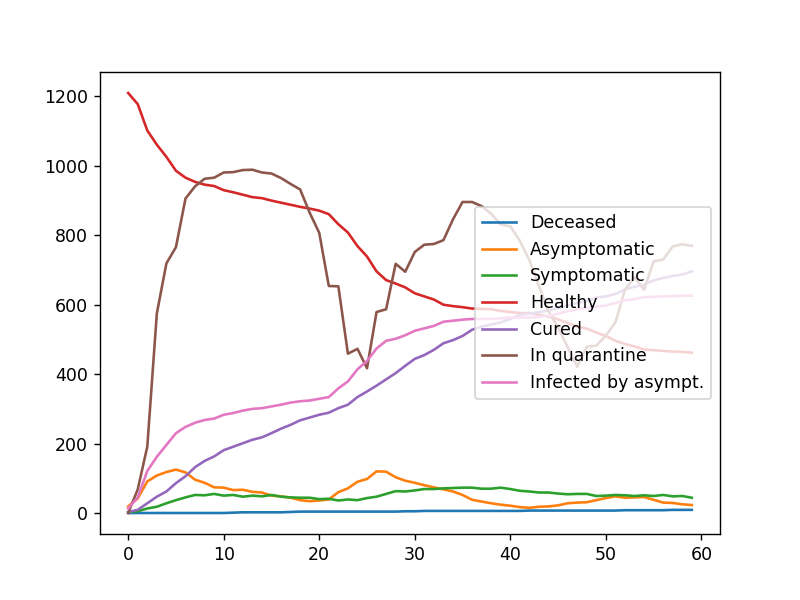

interactive(children=(FloatSlider(value=0.8, description='app_utilisation', max=1.0, step=0.01), FloatSlider(v…

<function __main__.update_prob(app_utilisation, report_to_app, quarantine_when_notif)>

In [8]:
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot()
xs = []
y_D = []
y_MS = []
y_MAS = []
y_S = []
y_G = []
y_Q = []
y_InfectByAS = []

def update_viz(graph):
    xs.append(len(xs))
    y_D.append(graph.nbDead)          # number of deceased people
    y_MS.append(graph.nbS)            # number of symptomatic people 
    y_MAS.append(graph.nbAS)          # number of asymptomatic people
    y_S.append(graph.nbHealthy)       # number of healthy people
    y_G.append(graph.nbCured)         # number of cured persons
    y_Q.append(graph.nbQuarantine)    # number of people in quarantine
    y_InfectByAS.append(graph.nbInfectedByAS) # number of people infected by asymp. people
    
def draw_viz():
    ax.cla()
    def plot_with_label(ys, label):
        line, = ax.plot(xs, ys)
        line.set_label(label)
    plot_with_label(y_D, "Deceased")
    plot_with_label(y_MAS, "Asymptomatic")
    plot_with_label(y_MS, "Symptomatic")
    plot_with_label(y_S, "Healthy")
    plot_with_label(y_G, "Cured")
    plot_with_label(y_Q, "In quarantine")
    plot_with_label(y_InfectByAS, "Infected by asympt.")

    ax.legend(loc='right')

def update_prob(app_utilisation, report_to_app, quarantine_when_notif):
    global utilApp
    global pReport
    global pQNotif
    global xs
    global y_D
    global y_MS
    global y_MAS
    global y_S
    global y_G
    global y_Q
    global y_InfectByAS
    
    utilApp = app_utilisation
    pReport = report_to_app
    pQNotif = quarantine_when_notif
    nbSteps = 60
    
    nbIndividuals = 1000 # you may change the number of individuals for the exponential distribution graph here

    graph = Graph()
    init_graph_household(graph) # default graph generation using households structure, as shown in the Results section
    # uncomment this to get a graph with degrees following an exponential distribution
    #init_graph_exp(graph)

    xs = []
    y_D = []
    y_MS = []
    y_MAS = []
    y_S = []
    y_G = []
    y_Q = []
    y_InfectByAS = []
    
    for _ in range(nbSteps):
        # update simulation
        step(graph)
        # update matplotlib
        update_viz(graph)
    draw_viz()
    plt.show()

update_prob(utilApp, pReport, pQNotif)

interact_manual(update_prob, app_utilisation = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value = utilApp), \
                    report_to_app = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value = pReport), \
                    quarantine_when_notif = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value = pQNotif))